In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [10]:
#reading the data
df=pd.read_csv("/content/main_drug.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [12]:
## getting dta information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [18]:
df.shape

(200, 6)

the dataset has 200 rows and 6 columns

In [20]:
#getting the columns of dataset
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [21]:
#checking null values
df.isna().sum().sort_values(ascending=False)

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

the datset has no null values

In [23]:
#check for balanced dataset
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [24]:
#statistical information
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [26]:
#storing the categorical columns in "cat_features"
cat_features=['Sex', 'BP', 'Cholesterol']

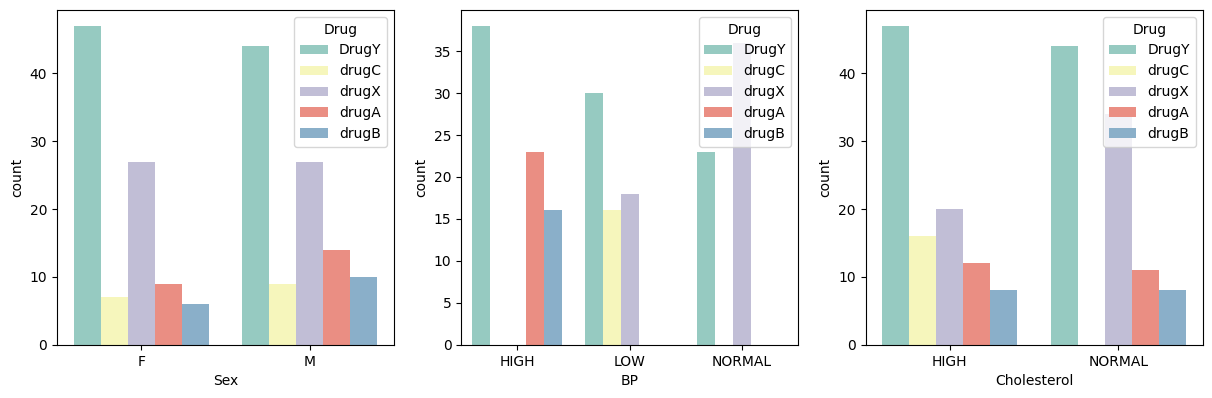

In [27]:
#countplot of each categorical feature
plt.figure(figsize=(20,20))
for i,col in enumerate(cat_features,1):
  plt.subplot(4,4,i)
  sns.countplot(data=df,x=col,hue="Drug",palette="Set3")

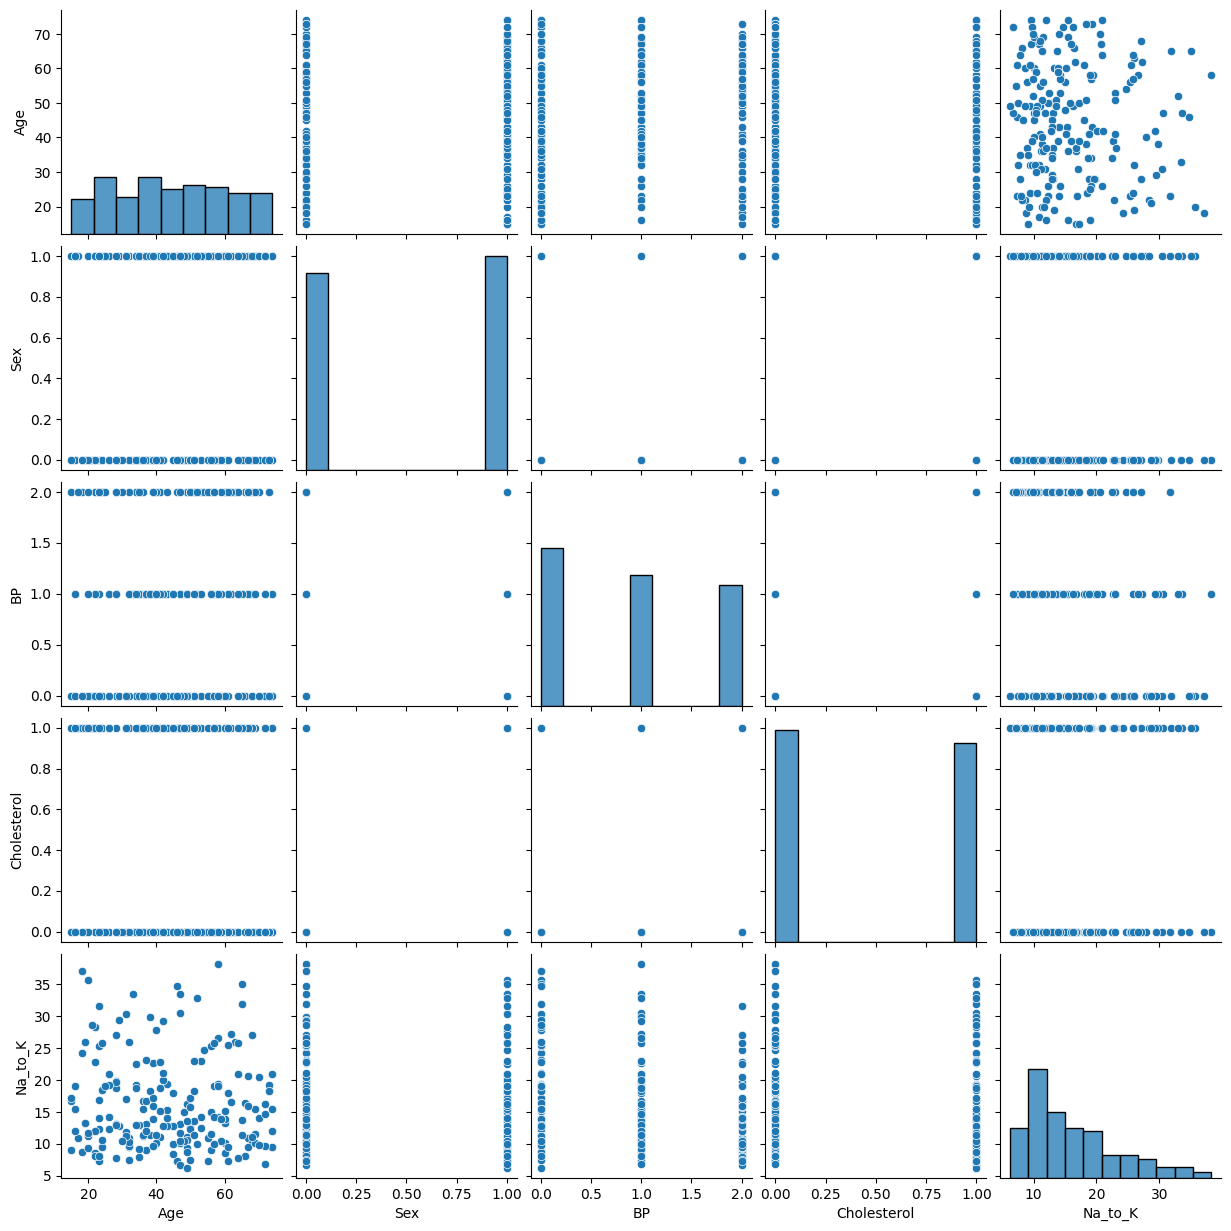

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
#checking for duplicates
df.duplicated().sum()

0

there is no duplicates in dataset

In [55]:
#encoding the categorical feature using Labelencoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df["Sex"])
df['BP']=label.fit_transform(df["BP"])
df['Cholesterol']=label.fit_transform(df["Cholesterol"])

In [31]:
#creating heatmap for checking multicollinearity
corr=df.corr()


<ipython-input-31-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

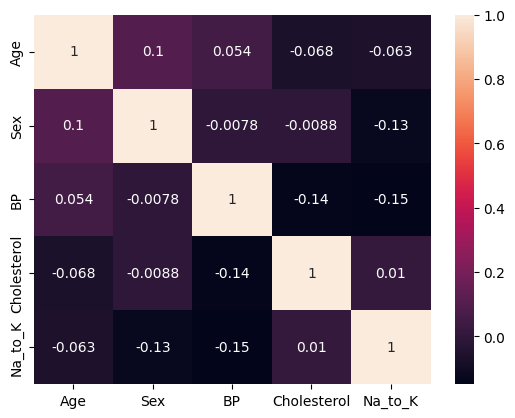

In [32]:
sns.heatmap(data=corr,annot=True)

In [56]:
#dividing the datset into independent and dependent feature
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [57]:
##dividing the datset into training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [44]:
#crating object for kneigbhorsclassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score

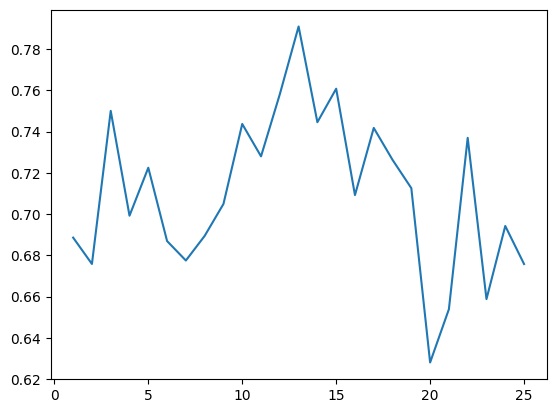

In [48]:
#graph with f2 score to find which k value has highest score
k_range = list(range(1, 26))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred_k = knn.predict(x_test)
    scores.append(fbeta_score(y_test, y_pred_k,beta=2,average='weighted'))
plt.plot(k_range, scores)
plt.show()

K=14 has highest f2_score


creating model with k=14

In [49]:
from sklearn.neighbors import KNeighborsClassifier
k=14
knn=KNeighborsClassifier(n_neighbors=k)

In [50]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [51]:
#predicting the values with test dataser
y_pred=knn.predict(x_test)

In [52]:
#classification report of model
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       DrugY       0.97      0.97      0.97        30
       drugA       0.50      0.60      0.55         5
       drugB       0.33      0.67      0.44         3
       drugC       0.00      0.00      0.00         4
       drugX       0.65      0.61      0.63        18

    accuracy                           0.75        60
   macro avg       0.49      0.57      0.52        60
weighted avg       0.74      0.75      0.74        60



In [54]:
#confusion matrix of model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[29,  0,  1,  0,  0],
       [ 0,  3,  0,  0,  2],
       [ 0,  0,  2,  0,  1],
       [ 1,  0,  0,  0,  3],
       [ 0,  3,  3,  1, 11]])